# Importing Data

In [1]:
from th_utilities import *

In [2]:
data = pd.read_csv("data.csv")
data.tail()

Name  Value
189   micrograph520     60
190   micrograph541    110
191  micrograph1001    100
192   micrograph925     90
193   micrograph309    150

In [3]:
tensor2d = data_generator(data)
tensor3d = data_generator3D(data)

Shape of 2D Data Generated:  (194, 448, 448)
Shape of 3D Data Generated:  (194, 448, 448, 3)


In [4]:
X = size_reduction(tensor2d)
Y = np.array(data['Value']).reshape(194,1)
print(X.shape)
print(Y.shape)

(194, 100, 100)
(194, 1)


# Model Creation and Training

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import model_from_json

Using TensorFlow backend.


In [9]:
X = size_reduction(tensor2d)
X = X
Y = np.array(data['Value']).reshape(194,1)
print(X.shape)
print(Y.shape)

(194, 100, 100)
(194, 1)


In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(16, 5, 5, input_shape=(100,100,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (5, 5), strides=(2,2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 5, 5, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (5, 5), strides=(2,2)))
               
classifier.add(Convolution2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))

classifier.add(Dense(units = 1))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'mse')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), input_shape=(100, 100,..., activation="relu")`
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu")`
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [11]:
classifier.fit(x = X.reshape(194,100,100,1), y = Y, epochs=50, validation_split=0.2)

Train on 155 samples, validate on 39 samples
Epoch 1/50
155/155 [==============================] - 4s 23ms/step - loss: 10085.6982 - val_loss: 3174.6341
Epoch 2/50
155/155 [==============================] - 3s 16ms/step - loss: 5073.3707 - val_loss: 721.6035
Epoch 3/50
155/155 [==============================] - 3s 17ms/step - loss: 4431.1535 - val_loss: 1031.3610
Epoch 4/50
155/155 [==============================] - 3s 16ms/step - loss: 3539.9293 - val_loss: 656.5521
Epoch 5/50
155/155 [==============================] - 3s 17ms/step - loss: 3726.7984 - val_loss: 660.4865
Epoch 6/50
155/155 [==============================] - 3s 17ms/step - loss: 3730.3222 - val_loss: 542.4647
Epoch 7/50
155/155 [==============================] - 3s 16ms/step - loss: 3540.8109 - val_loss: 530.0264
Epoch 8/50
155/155 [==============================] - 3s 17ms/step - loss: 3766.1199 - val_loss: 553.1000
Epoch 9/50
155/155 [==============================] - 3s 17ms/step - loss: 3211.6679 - val_loss: 537.608

In [12]:
classifier.fit(x = X.reshape(194,100,100,1), y = Y, epochs=50, validation_split=0.2)

Train on 155 samples, validate on 39 samples
Epoch 1/50
155/155 [==============================] - 3s 17ms/step - loss: 1156.3299 - val_loss: 389.0317
Epoch 2/50
155/155 [==============================] - 3s 17ms/step - loss: 998.5698 - val_loss: 570.8144
Epoch 3/50
155/155 [==============================] - 3s 17ms/step - loss: 996.3984 - val_loss: 392.1166
Epoch 4/50
155/155 [==============================] - 3s 18ms/step - loss: 1114.3898 - val_loss: 356.1059
Epoch 5/50
155/155 [==============================] - 3s 17ms/step - loss: 873.1071 - val_loss: 654.1336
Epoch 6/50
155/155 [==============================] - 2s 16ms/step - loss: 1797.1415 - val_loss: 465.1347
Epoch 7/50
155/155 [==============================] - 3s 17ms/step - loss: 1290.8678 - val_loss: 477.0634
Epoch 8/50
155/155 [==============================] - 3s 16ms/step - loss: 828.9479 - val_loss: 447.5136
Epoch 9/50
155/155 [==============================] - 3s 16ms/step - loss: 871.2754 - val_loss: 667.4142
Epoch 

# Predictions and Testing

In [14]:
print(classifier.predict(X[144].reshape(1,100,100,1)))
print(Y[144])

[[142.87785]]
[170]


[[142.87785]]
[170]


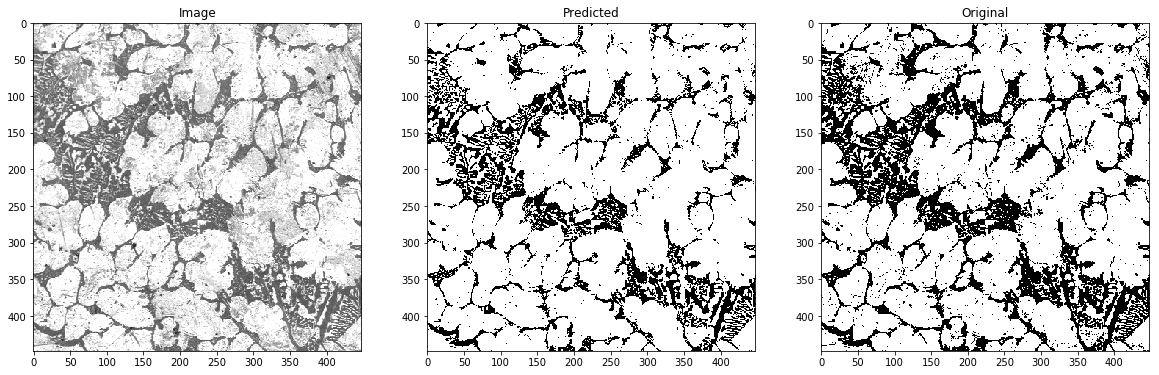

In [17]:
def plotter(i):
    print(classifier.predict(X[i].reshape(1,100,100,1)))
    print(Y[i])
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    image = [tensor2d[i], thresholding_func(tensor2d[i], classifier.predict(X[i].reshape(1,100,100,1))),
             thresholding_func(tensor2d[i], Y[i])]
    title = ['Image', 'Predicted', 'Original']
    for i in range(1, columns*rows +1):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.title(title[i-1])
        plt.imshow(image[i-1], cmap='gray')
    plt.show()

plotter(144)

[[117.77567]]
[140]


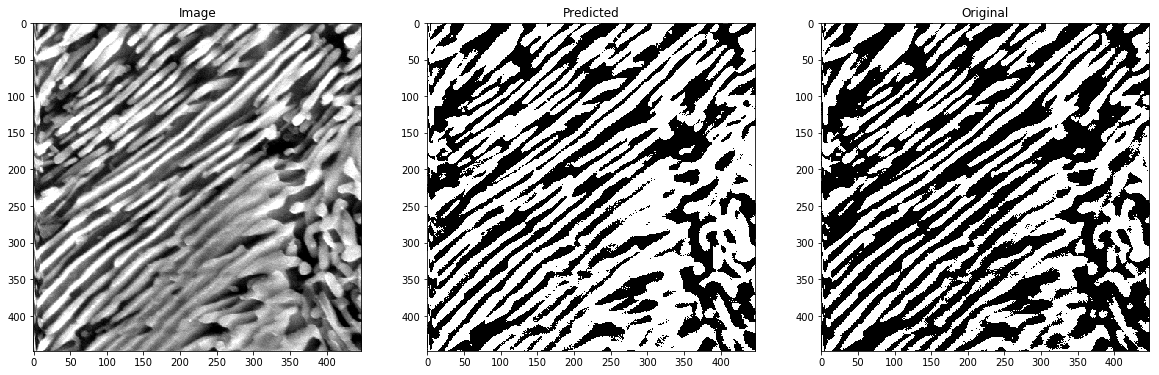

In [18]:
plotter(24)

[[71.48066]]
[90]


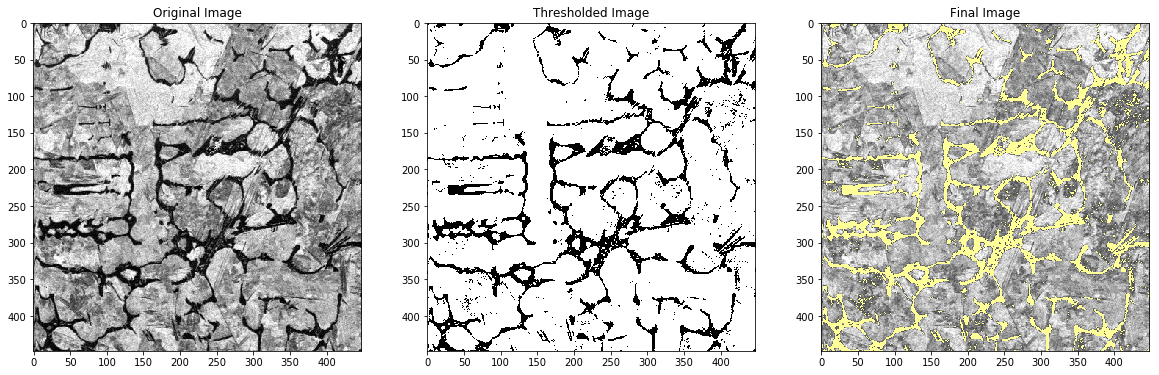

In [20]:
def color_plot(i,color=[255,255,153]):
    orig_img = tensor3d[i]
    gray_img = tensor2d[i]
    #print(orig_img.shape)
    #print(gray_img.shape)
    pred = classifier.predict(X[i].reshape((1,100,100,1)))
    print(pred)
    print(Y[i])
    pred_img = thresholding_func(gray_img, pred)
    #print(pred_img.shape)
    final_img = orig_img.copy()
    for i in range(448):
        for j in range(448):
            if pred_img[i,j] == 0:
                final_img[i,j,:] = np.array(color)
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    image = [orig_img, pred_img, final_img]
    title = ['Original Image', 'Thresholded Image', 'Final Image']
    for i in range(1, columns*rows +1):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.title(title[i-1])
        plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
    plt.show()
    
color_plot(14)

[[97.5023]]
[150]


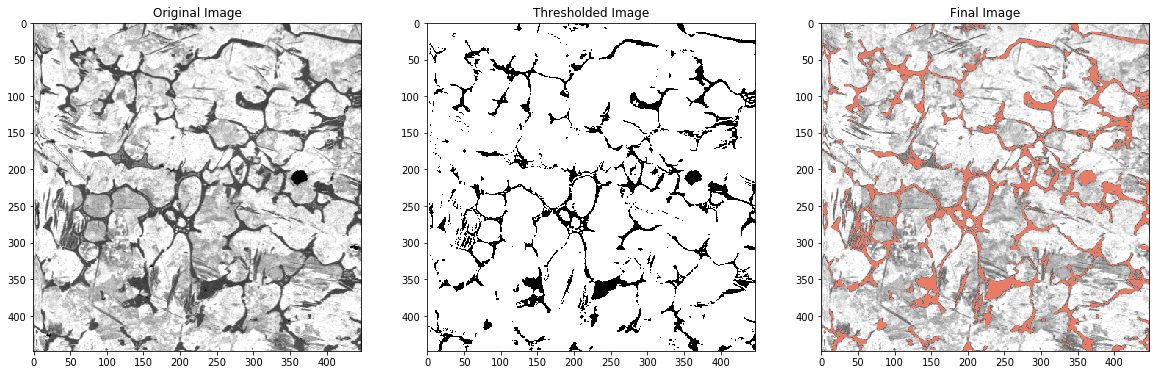

In [21]:
color_plot(150, [234,123,100])

[[97.5023]]
[150]


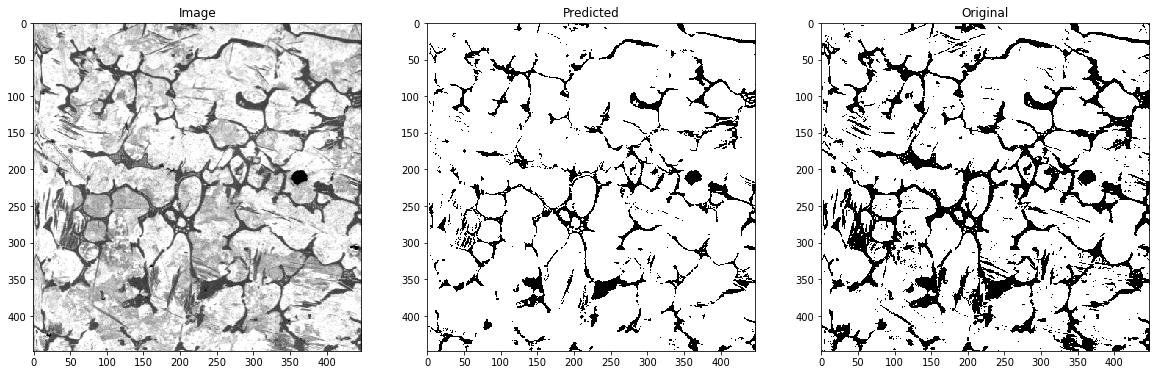

In [22]:
plotter(150)

[[88.81612]]
[100]


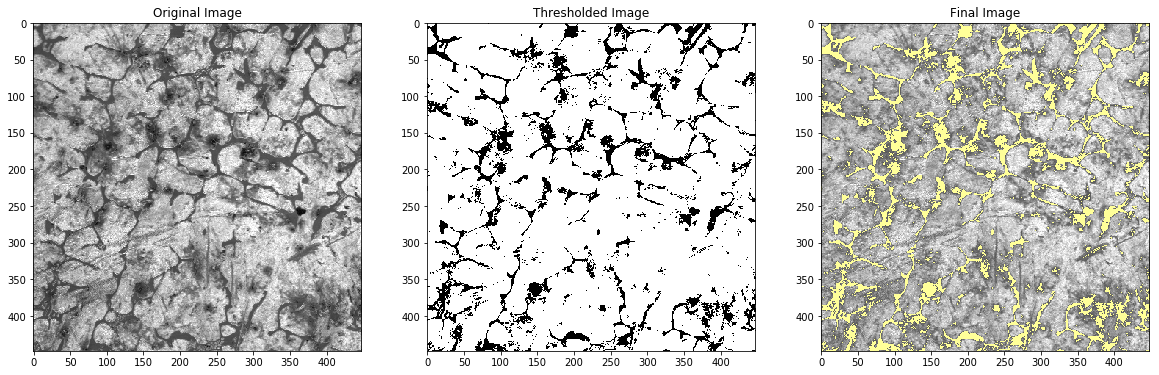

In [23]:
color_plot(10)

[[119.44048]]
[128]


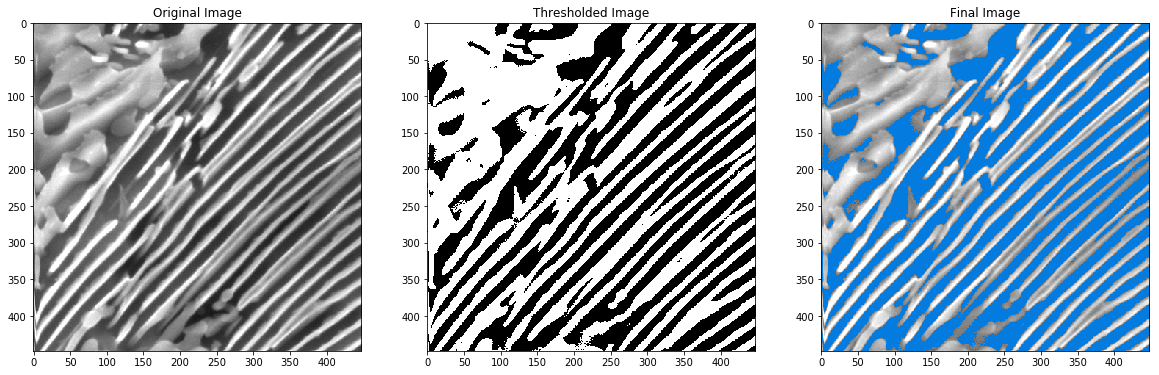

In [24]:
color_plot(184, [3,123,223])

[[119.763374]]
[150]


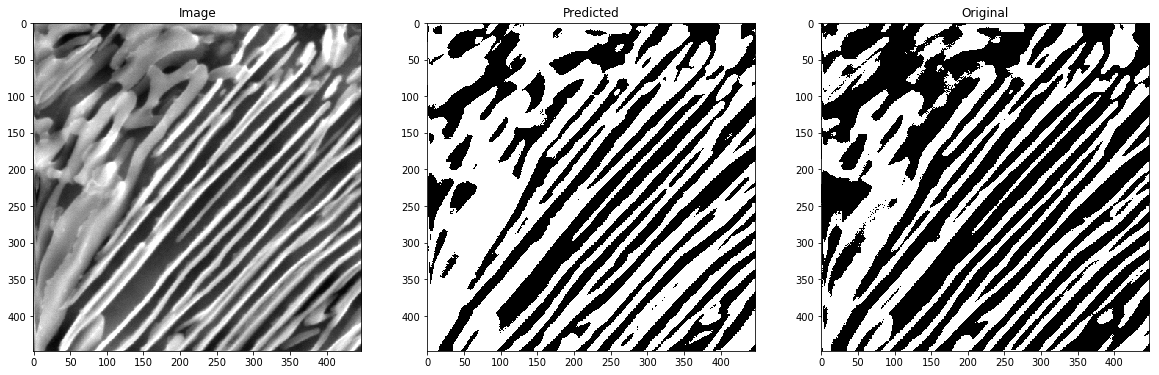

In [25]:
plotter(128)

[[59.096367]]
[70]


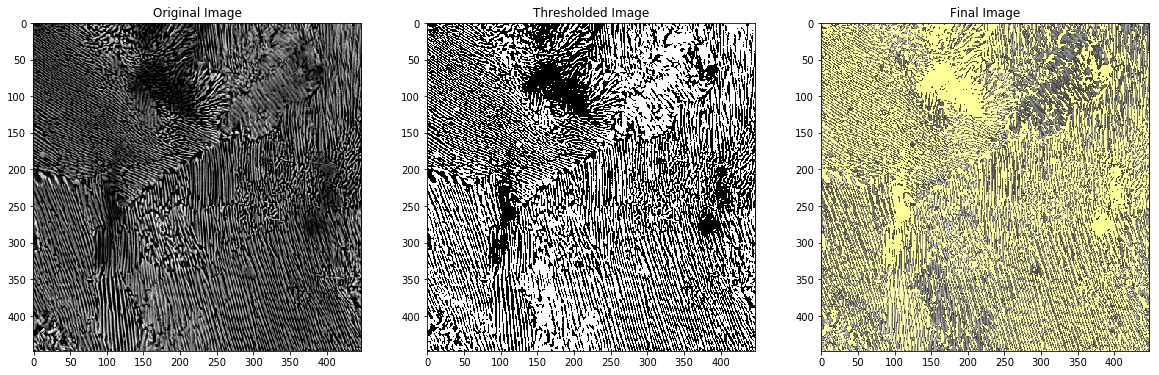

In [31]:
color_plot(13)

[[106.79926]]
[131]


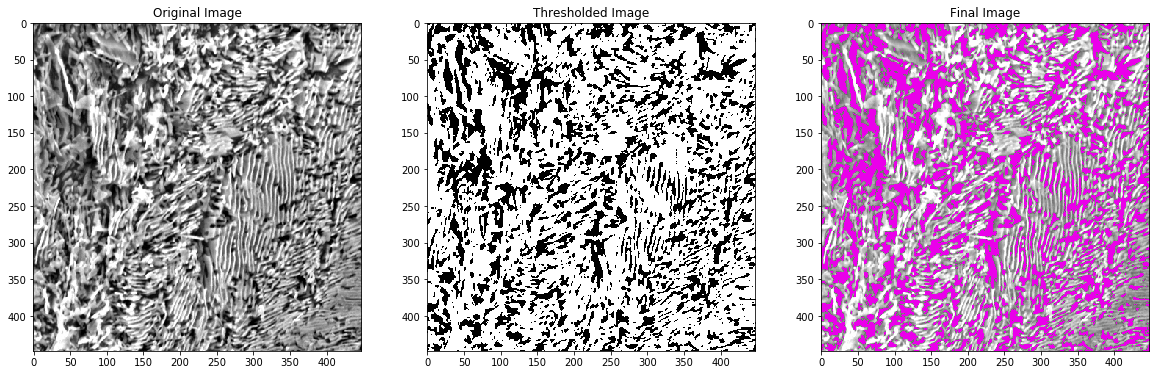

In [33]:
color_plot(32,[234,0,234])

[[94.525955]]
[150]


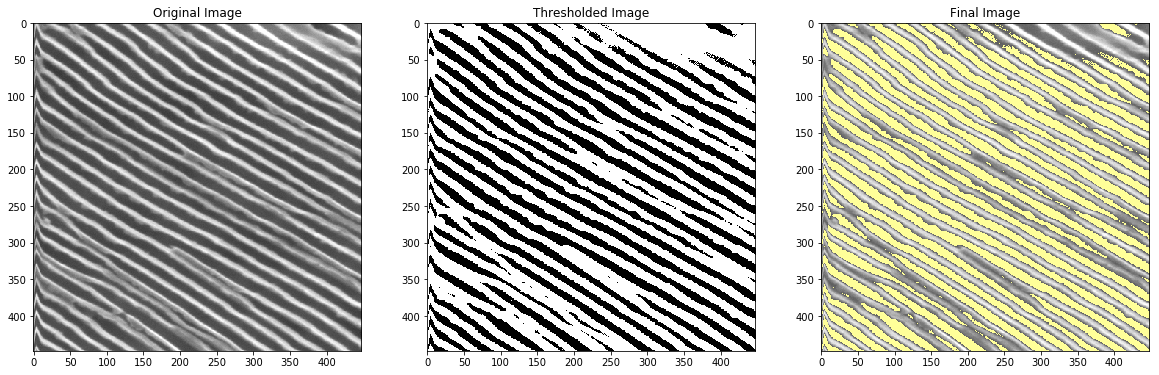

In [34]:
color_plot(193)

# Savinig the Model

In [26]:
# serialize model to JSON
model_json = classifier.to_json()
with open("Keras_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("Keras_model.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
json_file = open('Keras_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Keras_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [28]:
loaded_model.predict(X[0].reshape((1,100,100,1)))

array([[59.952625]], dtype=float32)

In [29]:
classifier.predict(X[0].reshape((1,100,100,1)))

array([[59.952625]], dtype=float32)